In [93]:
from pytraction.core import TractionForce
from pytraction.utils import plot

from skimage import io
import numpy as np
import matplotlib.pyplot as plt

# # # ######### Example 1
pix_per_mu = 1.3
E = 100 # Young's modulus in Pa

img_path = '../data/example1/e01_pos1_axon1.tif'
ref_path = '../data/example1/e01_pos1_axon1_ref.tif'

traction_obj = TractionForce(pix_per_mu, E=E)
img1, ref1, _ = traction_obj.load_data(img_path, ref_path)

img_path = '../data/example2/1kPa-2-Position006.tif'
ref_path = '../data/example2/1kPa-2-Position006_ref.tif'
roi_path = '../data/example2/1kPa-2-Position006.roi'

img2, ref2, roi = traction_obj.load_data(img_path, ref_path, roi_path)

img_path_bead = '../data/example3/Beads3.tif'
img_path_cell = '../data/example3/Cell3.tif'
ref_path = '../data/example3/BeadsStop.tif'

def z_project(img_path):
        img = io.imread(img_path)
        img_max= np.max(img, axis=0)
        return img_max

bead = z_project(img_path_bead)
cell = z_project(img_path_cell)
ref = z_project(ref_path)

img = np.stack([[bead, cell]])
ref = np.stack([ref, ref])

io.imsave('../data/example3/tfm.tif', img)
io.imsave('../data/example3/tfm-ref.tif', ref)


img_path = '../data/example3/tfm.tif'
ref_path = '../data/example3/tfm-ref.tif'

traction_obj = TractionForce(pix_per_mu, E=E, segment=True, window_size=16)

img3, ref3, roi = traction_obj.load_data(img_path, ref_path)

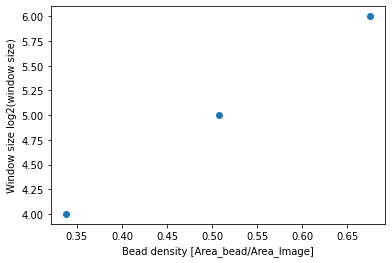

In [96]:
def density(img, window_size):
    clahe_img = clahe(normalize(img))
    norm = cv2.adaptiveThreshold(clahe_img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,5,2)/255
    
    ones = len(norm[norm == 1])
    
    area = img.shape[0]* img.shape[1]
    area_beads = ones/area
    
    return area_beads


x = [    
density(img1[0,0,:,:], window_size=32),
density(img2[0,0,:,:], window_size=64),
density(img3[0,0,:,:], window_size=16),
]

y = [
    32,64,16
]

plt.scatter(x,np.log2(y))
plt.ylabel('Window size log2(window size)')
plt.xlabel('Bead density [Area_bead/Area_Image]')

plt.show()

In [101]:
def density(img, window_size):
    clahe_img = clahe(normalize(img))
    norm = cv2.adaptiveThreshold(clahe_img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,5,2)/255
    
    ones = len(norm[norm == 1])
    
    area = img.shape[0]* img.shape[1]
    area_beads = ones/area
    
    return [area_beads, window_size]


x1 = np.array([density(img1[i,0,:,:], window_size=32) for i in range(img1.shape[0])])
x2 = np.array([density(img2[0,0,:,:], window_size=64) for i in range(img2.shape[0])])
x3 = np.array([density(img3[0,0,:,:], window_size=16) for i in range(img3.shape[0])])


In [106]:
x, y = np.concatenate([x1,x2,x3]).T

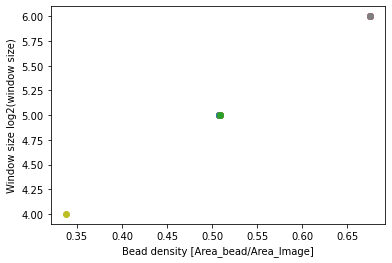

In [109]:
for x0, y0 in zip(x,y):
    plt.scatter(x0,np.log2(y0))

plt.ylabel('Window size log2(window size)')
plt.xlabel('Bead density [Area_bead/Area_Image]')

plt.show()